In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, List

from optimcourse.gradient_descent import gradient_descent
from optimcourse.optim_utilities import print_rec
from optimcourse.forward_propagation import (
    forward_propagation, 
    create_weights, 
    vector_to_weights,
    weights_to_vector)
from optimcourse.activation_functions import (
    relu,
    sigmoid
) 
from optimcourse.test_functions import (
    linear_function,
    ackley,
    sphere,
    quadratic,
    rosen,
    L1norm,
    sphereL1
)

# <center>Optimization Project with corrections </center>

This notebook contains the questions of the practical session along with complementary guidelines and examples. The code is written in Python. The questions are in red and numbered from 1 to 5.

## Code demo

Seat and relax, we will show you how to use the code for optimizing functions.
First plot examples of 2D functions.

/tmp/ipykernel_265287/1738570320.py:18: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca( projection='3d')


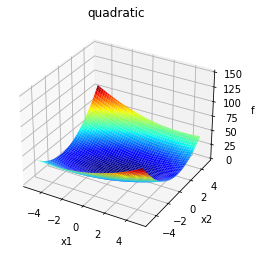

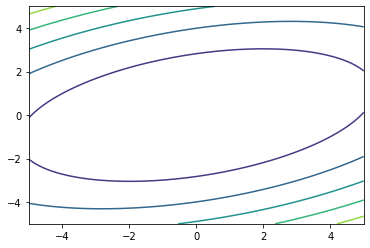

In [3]:
# function definition
dim = 2
LB = [-5,-5]
UB = [5,5]
fun = quadratic

  
# start drawing the function (necessarily dim==2)
no_grid = 100
# 

x1 = np.linspace(start=LB[0], stop=UB[0],num=no_grid)
x2 = np.linspace(start=LB[1], stop=UB[1],num=no_grid)
x, y = np.meshgrid(x1, x2)
xy = np.array([x,y])
z = np.apply_along_axis(fun,0,xy)
figure = plt.figure()
axis = figure.gca( projection='3d')
axis.set_zlim(0,150)
axis.plot_surface(x, y, z, cmap='jet', shade= "false")
plt.xlabel(xlabel="x1")
plt.ylabel(ylabel="x2")
plt.title(label=fun.__name__)
axis.set_zlabel("f")
plt.show()
plt.contour(x,y,z)
plt.show()
# figure.savefig('plot.pdf')

Now carry out some optimizations.  

Some explanations about results format parameters :  

printlevel : int, controls how much is recorded during optimization.  
       &emsp; = 0 for minimum recording (best point found and its obj function value)  
       &emsp; > 0 records history of best points  
       &emsp; > 1 records the entire history of points (memory consuming)    
        
The optimization results are dictionaries with the following key-value pairs:  
       &emsp; "f_best", float : best ojective function found during the search  
       &emsp; "x_best", 1D array : best point found   
       &emsp; "stop_condition" : str describing why the search stopped  
       &emsp; "time_used" , int : time actually used by search (may be smaller than max budget)  
       &emsp; if printlevel > 0 :  
          &emsp;&emsp;  "hist_f_best", list(float) : history of best so far objective functions  
           &emsp;&emsp; "hist_time_best", list(int) : times of recordings of new best so far  
           &emsp;&emsp; "hist_x_best", 2D array : history of best so far points as a matrix, each x is a row  
        &emsp;if printlevel > 1 :  
       &emsp;&emsp; "hist_f", list(float) : all f's calculated  
       &emsp;&emsp; "hist_x", 2D array : all x's calculated  
       &emsp;&emsp; "hist_time", list(int) : times of recording of full history  



search stopped after 3012 evaluations of f because of budget exhausted 
best objective function = 0.025120314415187483
best x = [0.84283366 0.70832149]


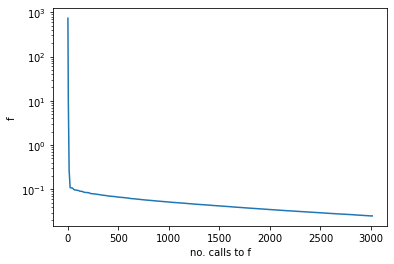

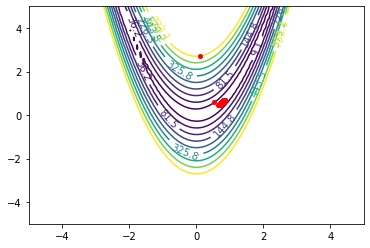

In [4]:
#########################
# function definition
fun = rosen
dim = 2
LB = [-5] * dim
UB = [5] * dim
# np.random.seed(123) # useful for repeated runs (quadratic fct or initial random point)

#########################
# algorithms settings
# start_x = np.array([3,2,1,-4.5,4.6,-2,-1,4.9,0,2])
# start_x = (1+np.arange(dim))*5/dim
# start_x = np.array([2.3,4.5])
start_x = np.random.uniform(low=LB,high=UB)

budget = 1000*(dim+1)
printlevel = 1  # =0,1,2 , careful with 2 which is memory consuming

#########################
# optimize
# res = random_opt(func=fun, LB=LB, UB=UB, budget=budget, printlevel=printlevel)
res = gradient_descent(func=fun,start_x=start_x, LB=LB,UB=UB,budget=budget,
                       step_factor=0.1,direction_type="momentum",
                       do_linesearch=True,min_step_size=1e-11,
                       min_grad_size=1e-6,inertia=0.9,printlevel=printlevel)

#########################
# reporting
print_rec(res=res, fun=fun, dim=dim, LB=LB, UB=UB , printlevel=printlevel, logscale = True)

## Understanding the code through an example

Let us consider the following test function which is associated to machine learning :

$$ f(x) = \sum_{i=1}^n (x_i - c_i)^2 + \lambda \sum_{i=1}^n \lvert x_i\rvert \quad,\quad \lambda \ge 0 $$
$$ c_i = i \quad \text{ and } \quad -5 = LB_i \le x_i \le UB_i = 5 \quad,\quad i=1,\ldots,n $$  

* First term: sphere function centered at $c$. A simplistic model to the mean square error of a NN where $c$ minimizes the training error.
* Second term: L1 norm times $\lambda$. The $x_i$'s would be the weights of a NN.
This term helps in improving the test error.

The function is already coded in `test_functions.py` as `sphereL1`. $\lambda$ is set in the function (open the file in your preferred Python editor).





Let us first plot the function in 2 dimensions:

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/tmp/ipykernel_265287/1551361969.py:21: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca( projection='3d')


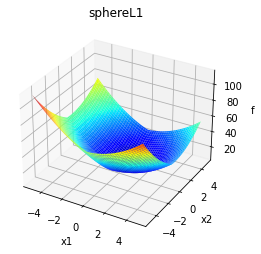

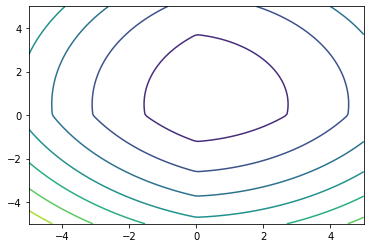

In [10]:
%load_ext autoreload
%autoreload 2
# function definition
dim = 2
LB = [-5,-5]
UB = [5,5]
fun = sphereL1

  
# start drawing the function (necessarily dim==2)
no_grid = 100
# 
# execute " %matplotlib qt5 " in the spyder console for interactive 3D plots 
# " %matplotlib inline " will get back to normal docking
x1 = np.linspace(start=LB[0], stop=UB[0],num=no_grid)
x2 = np.linspace(start=LB[1], stop=UB[1],num=no_grid)
x, y = np.meshgrid(x1, x2)
xy = np.array([x,y])
z = np.apply_along_axis(fun,0,xy)
figure = plt.figure()
axis = figure.gca( projection='3d')
axis.plot_surface(x, y, z, cmap='jet', shade= "false")
plt.xlabel(xlabel="x1")
plt.ylabel(ylabel="x2")
plt.title(label=fun.__name__)
axis.set_zlabel("f")
plt.show()
plt.contour(x,y,z)
plt.show()


### Questions : optimizing the `sphereL1` function

You will optimize the `sphereL1` function for various values of $\lambda$, $\lambda = \{0.001,0.1,1,5,10\}$ in `dim=10` dimensions.

To do this, edit the `main_optim.py` file, which gives an example with the code provided, and make sure that the function is described as follows  
```
# function definition
fun = test_functions.sphereL1
dim = 10
LB = [-5] * dim
UB = [5] * dim

```

Repeat optimizations for varying $\lambda$'s (parameter `lbda` dans `test_functions.sphereL1`)
1. What do you notice ? 
2. Assuming the $x$'s are weights of a neural network, what would be the effect of $\lambda$ on the network ?

Note : when changing `lbda`, it is important to reload the kernel or, to make it automatic, add the following lines of code
```
%load_ext autoreload
%autoreload 2
```

### Corrections : optimizing the `sphereL1` function

Edit `test_functions.sphereL1` for changing `lbda` before executing the follow. The notebook kernel __must be restarted__ for the new `lbda` to be taken into account.

search stopped after 1000 evaluations of f because of too small step 
best objective function = 163.949347930055
best x = [-6.93044256e-09  5.22566261e-01  1.60147669e+00  2.53447781e+00
  3.20878455e+00  4.17977198e+00  5.00000000e+00  5.00000000e+00
  5.00000000e+00  5.00000000e+00]


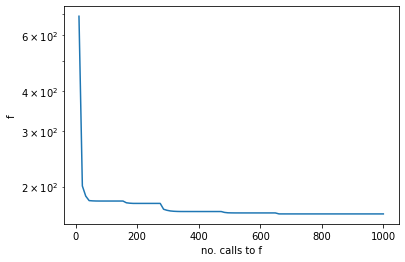

In [11]:
#########################
# function definition
fun = sphereL1
dim = 10
LB = [-5] * dim
UB = [5] * dim
# np.random.seed(123) # useful for repeated runs (quadratic fct or initial random point)

#########################
# algorithms settings
start_x = np.random.uniform(low=LB,high=UB)
budget = 1000*(dim+1)
printlevel = 1  # =0,1,2 , careful with 2 which is memory consuming

#########################
# optimize
# res = gradient_descent(func=fun,start_x=start_x, LB=LB,UB=UB,budget=budget,printlevel=printlevel)
res = gradient_descent(func=fun,start_x=start_x, LB=LB,UB=UB,budget=budget,
                       step_factor=0.1,direction_type="momentum",
                       do_linesearch=True,min_step_size=1e-11,
                       min_grad_size=1e-6,inertia=0.9,printlevel=printlevel)
# reporting
print(f'search stopped after {res["time_used"]} evaluations of f because of {res["stop_condition"]}')
print("best objective function =",res["f_best"])
print("best x =", res["x_best"])
if printlevel > 0:
    fig1, ax1 = plt.subplots()
    plt.yscale("log")
    ax1.plot((res["hist_time_best"]+ [res["time_used"]]) , (res["hist_f_best"] + [res["f_best"]]))
    ax1.set_xlabel("no. calls to f")
    ax1.set_ylabel("f")
    if printlevel > 1:
        ax1.plot(res["hist_time"],res["hist_f"])


Results : 
  
| lbda  | $x^\star$  | $f(x^\star)$  |  
| :---:  | :---:  | :----:  |  
|  0.01  |  $0.99, 1.99, 2.99, 3.99, 4.99, 5., 5., 5., 5., 5.$  |  55.40  |  
|  0.1  |  $0.95, 1.95, 2.95, 3.95, 4.95, 5., 5., 5., 5., 5.$  |  58.99  |  
|  1  |  $0.5, 1.5, 2.5, 3.5, 4.5, 5., 5., 5., 5., 5.$  |  93.75  |  
|  3  |  $0., 0.39, 1.46, 2.46, 3.56, 4.58, 5., 5., 5., 5.$  |  163.77  |  
|  6  |  $ 0., 0.01, 0.42, 1.33, 1.84, 3.16, 4.01, 4.63, 5., 5.$  |  250.48  |  
|  10  |  $ 0, 0, 0.05, 0.26, 0.47, 1.25, 1.73, 3.38, 3.67, 5.$  |  331.38  |  



__Question 1__ :  
    
As $\lambda$ increases, $x^\star$ moves away from $c$ and tends to 0. Some components of $x^\star$, those related to the low component values of $c$, are set to 0 faster than the others.  
This can be understood by looking at an optimization problem with a constraint on the L1 norm of $x$,
\begin{equation*}
\left\{
\begin{array}{l}
\min_x f(x) = \lVert x - c \rVert^2 \\
\text{tel que }~~ g(x) = \lVert x \rVert_1 - \tau \le 0 \quad,\quad \tau>0
\end{array}
\right.
\end{equation*}
The associated Lagrangian, to be minimized on $x$, is
\begin{equation*}
\min_x f(x) + \lambda^\star g(x) = \lVert x - c \rVert^2 + \lambda^\star \lVert x \rVert_1 - \lambda^\star\tau
\end{equation*}

The last term does not depend on $x$, and the 2 other terms are precisely those of the `sphereL1` function.
The drawing below shows the sphere function and the limit of the constraint on $\lVert x \rVert_1$. 
It is observed that the solution tends to be at a vertex of the feasible domain where components in $x$ cancel out.
This phenomenon becomes more visible when dimension increases.  

<img src="l1sphere_regularization-crop.png" alt="L1regularization" width="300"/>

__Question 2__ :  

Analogy with machine learning : if the components of $x$ are neural net weights, neuron connexions are deleted when some $x_i$'s are zero. This will prevent the network from overfitting the data. Generalization will be better. An important choice is the value of $\lambda$.




---


# A NEURAL NETWORK FROM SCRATCH

First let's import the needed modules. You are encouraged to have a look at `forward_propagation`.

### Data structure behind the forward propagation

The following network has 2 layers, the first going from 4 input components to the 3 internal neurons, the second going from the 3 internal neurons outputs to the 2 outputs. Don't forget the additional weight for the neurons biases.

In [12]:
inputs = np.array([[1,2,5,4],[1,0.2,0.15,0.024]])
weights = [
        np.array(
            [
                [1,0.2,0.5,1,-1],
                [2,1,3,5,0],
                [0.2,0.1,0.6,0.78,1]
            ]
        ),
    np.array(
            [
                [1,0.2,0.5,1],
                [2,1,3,5]
            ]
        )
    ]
activation = sigmoid
forward_propagation(inputs,weights,activation)

array([[0.93695121, 0.99998324],
       [0.89266103, 0.99991581]])

### Create a data set 
The data set is made of points sampled randomly from a function.

In [14]:
def simulate_data_target(fun: Callable,
                       n_features: int,
                       n_obs: int,
                       LB: List[float],
                       UB: List[float]) -> dict:
    
    entry_data = np.random.uniform(low= LB,high=UB,
                                   size=(n_obs, n_features))
    target = np.apply_along_axis(fun, 1, entry_data)
    
    return {"data": entry_data, "target": target}

In [15]:
used_function = linear_function
n_features = 2
n_obs = 10
LB = [-5] * n_features
UB = [5] * n_features
simulated_data = simulate_data_target(fun = used_function,n_features = n_features,n_obs=n_obs,LB=LB,UB=UB)

### Make a neural network, randomly initialize its weights, propagate input data

Create a NN with 1 layer, 2 inputs and 1 output. Propagate the data inputs through it.

In [16]:
network_structure = [2,1]
weights = create_weights(network_structure)
weights_as_vector,_ = weights_to_vector(weights)
dim = len(weights_as_vector)
print("weights=",weights)
print("dim=",dim)

weights= [array([[-0.38900894,  1.62159464, -0.49951914]])]
dim= 3


In [17]:
predicted_output = forward_propagation(simulated_data["data"],weights,sigmoid)
print(predicted_output)

[[4.39733541e-02]
 [5.92375838e-01]
 [5.85496838e-02]
 [1.46634516e-04]
 [8.58116320e-01]
 [9.61630898e-01]
 [1.01202896e-03]
 [7.08343321e-03]
 [8.43324780e-02]
 [9.98986193e-01]]


Compare the data and the prediction of the network. Of course, at this point, no training is done so they are different. They just have the same format (provided a `reshape` is done).

In [18]:
simulated_data["target"]

array([ 5.02617183,  0.43179079,  4.38231321, -5.13971235, 10.64510889,
       13.28452615, -6.58881702, -0.75254867, -1.74972603, 12.42338049])

In [19]:
predicted_output.reshape(-1,)

array([4.39733541e-02, 5.92375838e-01, 5.85496838e-02, 1.46634516e-04,
       8.58116320e-01, 9.61630898e-01, 1.01202896e-03, 7.08343321e-03,
       8.43324780e-02, 9.98986193e-01])

### Error functions 

A utility function to transform a vector into weight matrices. You will probably not need it, but this is used in the calculation of the error function (the vector is transformed into NN weights, ...).

In [20]:
vector_to_weights([0.28677805, -0.07982693,  0.37394315],network_structure)

[array([[ 0.28677805, -0.07982693,  0.37394315]])]

We define 2 error functions, one for regression is the mean square error, the other is the cross-entropy error for classification.

In [21]:
# mean squared error
def cost_function_mse(y_predicted: np.ndarray,y_observed: np.ndarray):
    error = 0.5 * np.mean((y_predicted - y_observed)**2)
    return error

In [22]:
# entropy
def cost_function_entropy(y_predicted: np.ndarray,y_observed: np.ndarray):

    n = len(y_observed)
    
    term_A = np.multiply(np.log(y_predicted),y_observed)
    term_B = np.multiply(1-y_observed,np.log(1-y_predicted))
    
    error = - (1/n)*(np.sum(term_A)+np.sum(term_B))

    return(error)

In [24]:
def error_with_parameters(vector_weights: np.ndarray,
                          network_structure: List[int],
                          activation_function: Callable,
                          data: dict,
                          cost_function: Callable,
                          regularization: float = 0) -> float:
    
    weights = vector_to_weights(vector_weights,used_network_structure)
    predicted_output = forward_propagation(data["data"],weights,activation_function)
    predicted_output = predicted_output.reshape(-1,)
    
    error = cost_function(predicted_output,data["target"]) + regularization * np.sum(np.abs(vector_weights))
    
    return error

In [25]:
used_network_structure = [2,1] # 2 inputs features, 1 layer with 1 node
used_activation = relu
used_data = simulated_data
used_cost_function = cost_function_mse


def neural_network_cost(vector_weights):
    
    cost = error_with_parameters(vector_weights,
                                 network_structure = used_network_structure,
                                 activation_function = used_activation,
                                 data = used_data,
                                 cost_function = used_cost_function)
    
    return cost

Below, the cost function associated to the neural network is calculated from a simple vector in a manner similar to $f(x)$, therefore prone to optimization. The translation of the vector into as many weight matrices as necessary is done thanks to the `used_network_structure` defined above and passed implicitely thanks to Python's scoping rules.

In [26]:
random_weights_as_vect = np.random.uniform(size=dim)
neural_network_cost(random_weights_as_vect)

16.170011663047774

### Learn the network by gradient descent

In [27]:
LB = [-5] * 3 
UB = [5] * 3
printlevel = 1
res = gradient_descent(func = neural_network_cost,
                 start_x = np.array([0.28677805, -0.07982693,  0.37394315]),
                 LB = LB, UB = UB,budget = 1000,printlevel=printlevel)

search stopped after 954 evaluations of f because of too small step 
best objective function = 3.672851174523899
best x = [0.99999498 2.00000614 3.00001772]


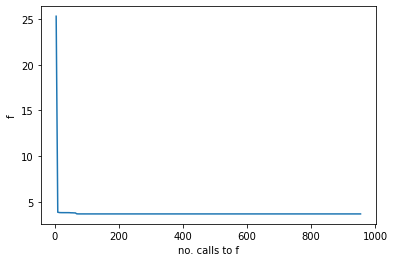

In [28]:
print_rec(res=res, fun=neural_network_cost, dim=len(res["x_best"]), 
          LB=LB, UB=UB , printlevel=printlevel, logscale = False)

## Question : Make your own network

3. Generate 100 data points with the quadratic function in 2 dimensions.
4. Create a network with 2 inputs, 5 ReLU neurons in the hidden layer, and 1 output.
5. Learn it on the quadratic data points you generated. Plot some results, discuss them.

### Generate the data

In [29]:
used_function = quadratic
n_features = 2
n_obs = 100
LBfeatures = [-5] * n_features
UBfeatures = [5] * n_features
simulated_data = simulate_data_target(fun = used_function,n_features = n_features,n_obs=n_obs,
                                      LB=LBfeatures,UB=UBfeatures)

### Create the network
and calculate the cost function of the first, randomly initialized, network.

In [30]:
network_structure = [2,5,1]
weights = create_weights(network_structure)
weights_as_vector,_ = weights_to_vector(weights)
dim = len(weights_as_vector) 
used_network_structure = [2,5,1]
used_activation = relu
used_data = simulated_data
used_cost_function = cost_function_mse
print("Number of weights to learn : ",dim)
print("Initial cost of the NN : ",neural_network_cost(weights_as_vector))

Number of weights to learn :  21
Initial cost of the NN :  336.8193493639274


### Learn the network

search stopped after 10023 evaluations of f because of budget exhausted 
best objective function = 1.2258894838885148
best x = [-0.06542514 -1.9794698  -2.74429071  0.00564774  2.72920464 -4.20138434
 -1.57306801 -0.20094931 -0.53420545 -0.02202981 -1.39862473 -3.82860733
  1.46085791 -1.34547303 -2.08072257  3.32362382  5.03457634  1.47308344
  3.96949401  2.33269135  0.68777855]


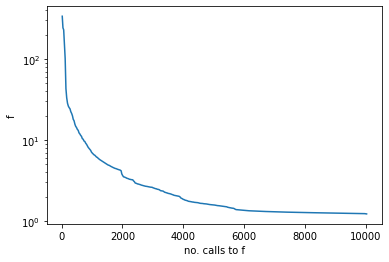

In [31]:
LB = [-10] * dim
UB = [10] * dim
printlevel = 1
res = gradient_descent(func = neural_network_cost,
                 start_x = weights_as_vector,
                 LB = LB, UB = UB,budget = 10000,printlevel=printlevel)
print_rec(res=res, fun=neural_network_cost, dim=len(res["x_best"]), 
          LB=LB, UB=UB , printlevel=printlevel, logscale = True)

weights_best = vector_to_weights(res["x_best"],network_structure)


In [32]:
print("Best NN weights:",weights_best)

Best NN weights: [array([[-0.06542514, -1.9794698 , -2.74429071],
       [ 0.00564774,  2.72920464, -4.20138434],
       [-1.57306801, -0.20094931, -0.53420545],
       [-0.02202981, -1.39862473, -3.82860733],
       [ 1.46085791, -1.34547303, -2.08072257]]), array([[3.32362382, 5.03457634, 1.47308344, 3.96949401, 2.33269135,
        0.68777855]])]


Compare the network prediction to the true function


/tmp/ipykernel_265287/2847421482.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca( projection='3d')


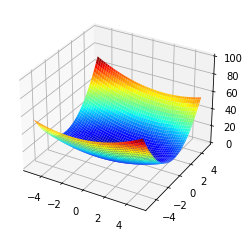

In [33]:
import matplotlib.pyplot as plt
# function definition
dimFunc = 2
LBfunc = [-5,-5]
UBfunc = [5,5]
fun = quadratic
  
# start drawing the function (necessarily dim==2)
no_grid = 100
# 
x1 = np.linspace(start=LBfunc[0], stop=UBfunc[0],num=no_grid)
x2 = np.linspace(start=LBfunc[1], stop=UBfunc[1],num=no_grid)
x, y = np.meshgrid(x1, x2)
xy = np.array([x,y])
z = np.apply_along_axis(fun,0,xy)
# work in progress
# does not work yet
# zNN = np.apply_along_axis(forward_propagation,0,xy,weights_best,used_activation)
figure = plt.figure()
axis = figure.gca( projection='3d')
axis.set_zlim(0,100)
axis.plot_surface(x, y, z, cmap='jet', shade= "false")


# **FIN DU NOTEBOOK**